In [1]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient
import os

# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=os.environ.get("OPENAI_API_KEY"),
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="Find information on AutoGen", source="user")],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message)


# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

[ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=61, completion_tokens=16), content=[FunctionCall(id='call_P7MJlzmb8vnk5jrfxRmkgOL0', arguments='{"query":"AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', call_id='call_P7MJlzmb8vnk5jrfxRmkgOL0', is_error=False)], type='ToolCallExecutionEvent')]
source='assistant' models_usage=None content='AutoGen is a programming framework for building multi-agent applications.' type='ToolCallSummaryMessage'


## Multi-modal input


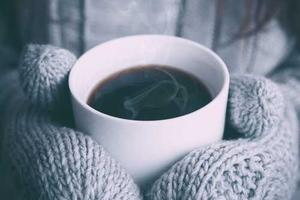

In [2]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [3]:
# Use asyncio.run(...) when running in a script.
response = await agent.on_messages([multi_modal_message], CancellationToken())
print(response.chat_message.content)

The image shows a person holding a mug of hot coffee with both hands. The hands are covered in knitted gloves, suggesting a cold environment. Steam is rising from the coffee, emphasizing its warmth.


### Streaming Messages
We can also stream each message as it is generated by the agent by using the on_messages_stream() method, and use Console to print the messages as they appear to the console.

In [7]:
async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.on_messages_stream(
    #     [TextMessage(content="Find information on AutoGen", source="user")],
    #     cancellation_token=CancellationToken(),
    # ):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.on_messages_stream(
            [TextMessage(content="Find information on AutoGen", source="user")],
            cancellation_token=CancellationToken(),
        ),
        output_stats=True,  # Enable stats printing.
    )


# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()

---------- assistant ----------
[FunctionCall(id='call_rdbYwWU685TCgprBxBhuPFak', arguments='{"query":"AutoGen framework overview"}', name='web_search')]
[Prompt tokens: 765, Completion tokens: 18]
---------- assistant ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', call_id='call_rdbYwWU685TCgprBxBhuPFak', is_error=False)]
[FunctionCall(id='call_rdbYwWU685TCgprBxBhuPFak', arguments='{"query":"AutoGen framework overview"}', name='web_search')]
[Prompt tokens: 765, Completion tokens: 18]
---------- assistant ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', call_id='call_rdbYwWU685TCgprBxBhuPFak', is_error=False)]
---------- assistant ----------
AutoGen is a programming framework for building multi-agent applications.
---------- Summary ----------
Number of inner messages: 2
Total prompt tokens: 765
Total completion tokens: 18
Duration: 1.30 seco